#### ADS per valutare le prestazioni di un modello

* in questo Notebook mostro come è possibile usare ADS ed un DS Evaluator per calcolare rapidamente le metriche prestazionali di un modello

In [17]:
import gc
import pickle

import pandas as pd
import numpy as np
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score

import matplotlib.pyplot as plt

import lightgbm as lgb

In [2]:
loaded_model = pickle.load(open("./model-files/model.pkl", "rb"))

In [3]:
orig_train = pd.read_parquet("train_augmented.parquet")

In [4]:
TARGET = 'is_attributed'

# train, validation split
TRAIN_FRAC = 0.98

N_TRAIN = int(orig_train.shape[0] * TRAIN_FRAC)

# shuffle
orig_train = orig_train.sample(frac=1.)

df_train = orig_train[:N_TRAIN]
df_valid = orig_train[N_TRAIN:]

print('Original training samples:', df_train.shape[0])
print('Num. validation samples:', df_valid.shape[0])

Original training samples: 181205812
Num. validation samples: 3698078


In [5]:
feat = ['ip', 'app', 'device', 'os', 'channel',
       'hour', 'day', 'ip_app_channel_var_day', 'qty', 'ip_app_count',
       'qty_var', 'ip_app_os_count', 'ip_app_os_var',
       'ip_app_channel_mean_hour']

# removed ip because it is high cardinality
cat_feat = ['app', 'device', 'os', 'channel']

x_train = df_train[feat]
y_train = df_train[TARGET]

x_valid = df_valid[feat]
y_valid = df_valid[TARGET]

In [10]:
from ads.common.model import ADSModel

from ads.common.data import ADSData

ads_model = ADSModel.from_estimator(loaded_model, classes=[0,1])

In [12]:
from ads.evaluations.evaluator import ADSEvaluator

test_data = ADSData.build(X=x_valid, y=y_valid)

evaluator = ADSEvaluator(test_data=test_data, models=[ads_model])

  FutureWarning)



In [13]:
evaluator.metrics

HTML(value='<style  type="text/css" >\n    #T_72ae5be8_e0bd_11eb_bc19_0242ac130002  {\n          text-align: r…

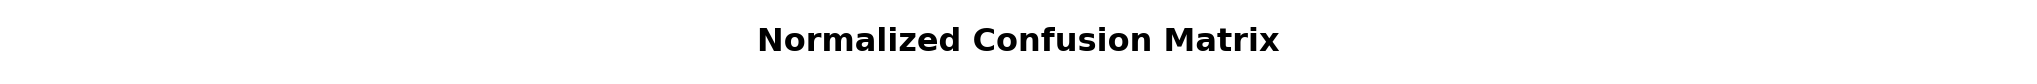

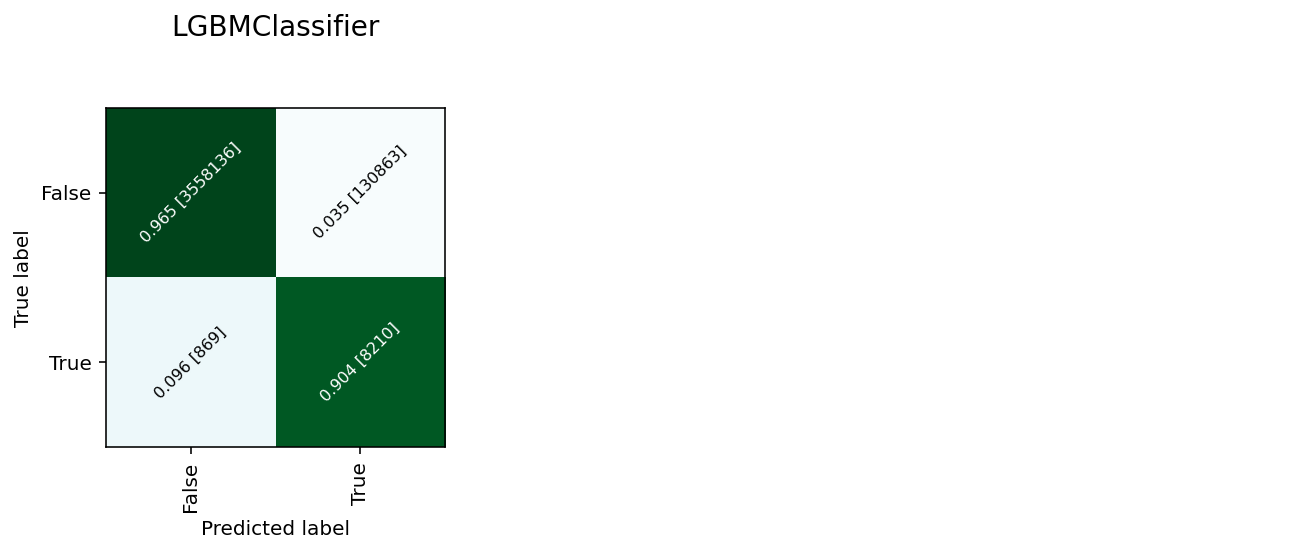

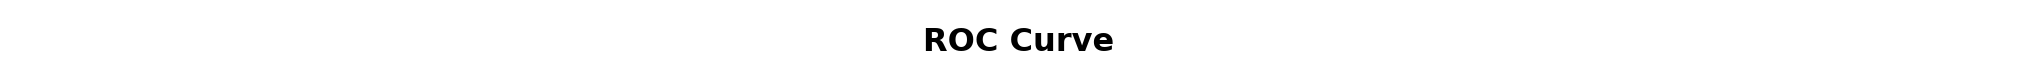

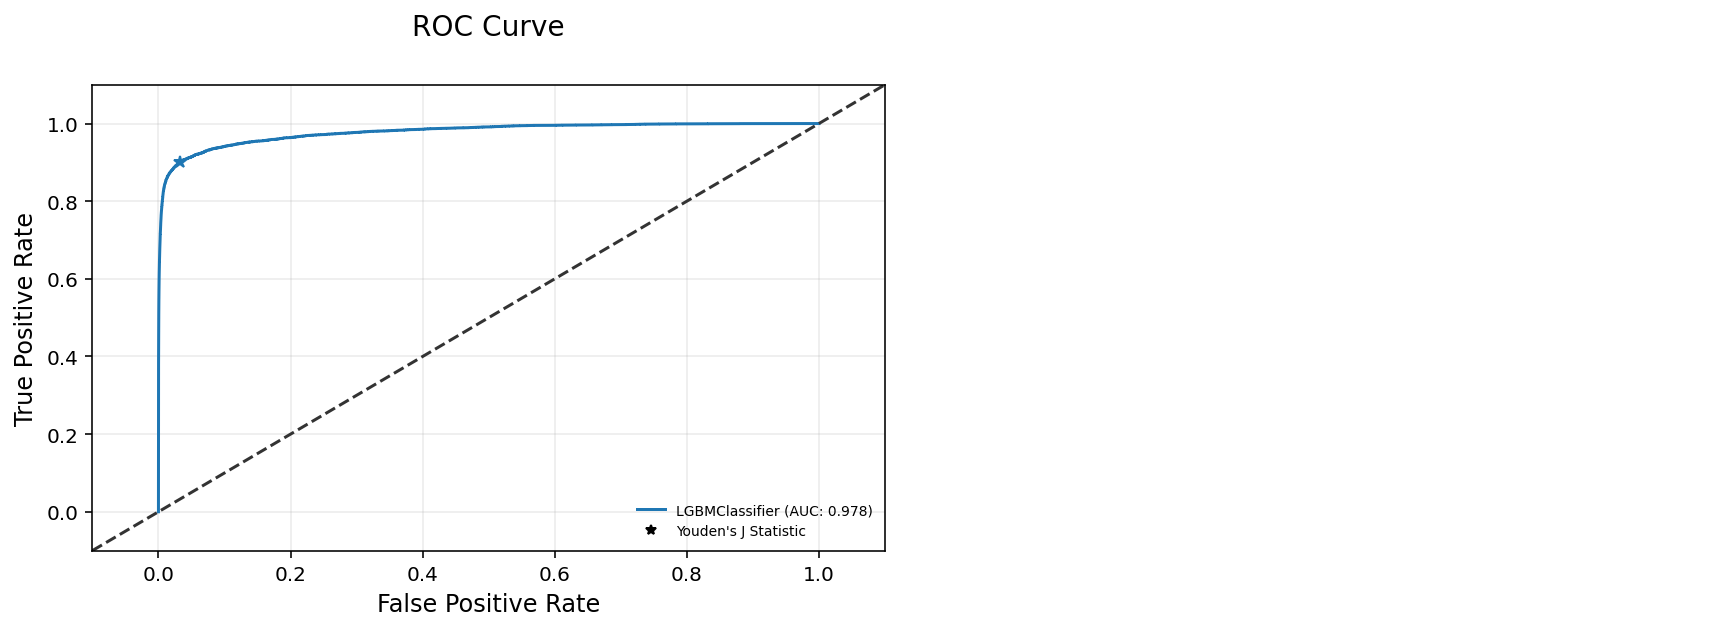

In [20]:
evaluator.show_in_notebook(perfect=True, plots=['normalized_confusion_matrix', 'roc_curve']);